# Starting modeling over

In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.pipeline import Pipeline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df= pd.read_csv('data/modeldf.csv')

In [3]:
df.shape

(5793, 83)

In [1]:
df.head(1)

NameError: name 'df' is not defined

In [5]:
# setting features and target

X, y = df.iloc[:,1:], df.iloc[:,0]

# Separating train test, and validation sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [7]:
X_train.shape

(3475, 82)

In [8]:
X_val.shape

(1159, 82)

In [9]:
X_test.shape

(1159, 82)

In [31]:
y_val

4236    1901
5111      52
5367      95
5500     179
5233       6
        ... 
5344      15
2436    2567
795     4869
690     2333
1622     588
Name: num_reviews, Length: 1159, dtype: int64

# Baseline scoring

In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.10063950317150971

# Adding complexity

### Starting with polynomial features

In [10]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_val_poly = poly.transform(X_val)




In [11]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.9999984694040785

In [12]:
lr_poly.score(X_val_poly, y_val)

-28.2718447446564

In [48]:
scaler = StandardScaler()

In [58]:
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)

In [13]:
lasso = LassoCV()
lasso.fit(X_train_poly,y_train)
lasso.score(X_train_poly,y_train)

KeyboardInterrupt: 

In [15]:
lasso.score(X_val_poly, y_val)

0.08245700167700187

In [60]:
df.head(1)

,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled,Activision,BANDAI NAMCO Entertainment,Capcom,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,36837,0,59.99,20.0,3.0,2021,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using PolynomialFeatures on only numerical columns

In [61]:
list(df.columns)

['num_reviews',
 'been_sale',
 'orig_price',
 'num_tags',
 'num_genres',
 'year_released',
 'languages_filled',
 'Activision',
 'BANDAI NAMCO Entertainment',
 'Capcom',
 'Devolver Digital',
 'Disney',
 'Electronic Arts',
 'Paradox Interactive',
 'SEGA',
 'Sokpop Collective',
 'Square Enix',
 'THQ Nordic',
 'Ubisoft',
 'Winged Cloud',
 'other',
 'tinyBuild',
 'rating_val',
 'Singleplayer_tag',
 'Indie_tag',
 'Action_tag',
 'Adventure_tag',
 'Casual_tag',
 'Strategy_tag',
 'Multiplayer_tag',
 'RPG_tag',
 'Simulation_tag',
 'Atmospheric_tag',
 'Horror_tag',
 '2D_tag',
 'Soundtrack_tag',
 'Great_tag',
 'Story_tag',
 'Rich_tag',
 'World_tag',
 'Shooter_tag',
 'Puzzle_tag',
 'TurnBased_tag',
 'Open_tag',
 'FirstPerson_tag',
 'Survival_tag',
 'Fantasy_tag',
 'Funny_tag',
 'Coop_tag',
 'Platformer_tag',
 'Early_tag',
 'Access_tag',
 'Sim_tag',
 'Indie_genre',
 'Action_genre',
 'Adventure_genre',
 'Casual_genre',
 'Simulation_genre',
 'Strategy_genre',
 'RPG_genre',
 '_genre',
 'Early_genre',
 

In [40]:
X, y = df.iloc[:,1:7], df.iloc[:,0]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.05514793335285895

In [43]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_val_poly = poly.transform(X_val)





In [55]:
X_train_poly

[array([[1.00000000e+00, 0.00000000e+00, 1.49900000e+01, ...,
         4.07232400e+06, 2.26525791e+04, 1.26006511e+02],
        [1.00000000e+00, 0.00000000e+00, 4.99000000e+00, ...,
         4.07232400e+06, 2.26525791e+04, 1.26006511e+02],
        [1.00000000e+00, 1.00000000e+00, 4.99000000e+00, ...,
         4.06828900e+06, 2.26413539e+04, 1.26006511e+02],
        ...,
        [1.00000000e+00, 0.00000000e+00, 9.99000000e+00, ...,
         4.06828900e+06, 1.61360000e+04, 6.40000000e+01],
        [1.00000000e+00, 0.00000000e+00, 6.99000000e+00, ...,
         4.03608100e+06, 2.25515518e+04, 1.26006511e+02],
        [1.00000000e+00, 1.00000000e+00, 4.99000000e+00, ...,
         4.04010000e+06, 1.40700000e+04, 4.90000000e+01]])]

In [44]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.13122011613911277

In [58]:
lr_poly.score(X_val_poly,y_val)

0.14959687416797918

In [35]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x4^2',
 'x4 x5',
 'x5^2']

In [101]:
len(lr_poly.coef_)

28

In [102]:
lr_poly.predict(X_val_poly)

array([  9473.42905444,   2612.87289959,  -1919.33026063, ...,
       -17712.56781983,   -578.13196766,  11144.78191608])

In [103]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)

In [105]:
lasso = LassoCV()
lasso.fit(X_train_poly,y_train)
lasso.score(X_train_poly,y_train)

0.08674649113373978

In [ ]:
lr_poly

In [57]:
df.corr()

,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled,Activision,BANDAI NAMCO Entertainment,Capcom,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
num_reviews,1.000000,-0.047019,0.132664,0.144433,0.015069,-0.087137,1.037193e-01,0.005702,0.021226,0.001076,...,0.045135,0.009762,0.000084,0.044563,0.033532,0.070793,0.002270,0.003451,-0.015161,-0.015161
been_sale,-0.047019,1.000000,-0.063496,-0.003878,0.045313,0.054404,-2.356069e-04,-0.023535,-0.036895,0.161308,...,-0.000857,0.019340,-0.006375,-0.028740,0.033452,-0.036895,-0.011349,-0.008595,-0.035662,-0.035662
orig_price,0.132664,-0.063496,1.000000,0.179873,0.002355,0.062747,-9.391677e-02,0.043184,0.170089,0.030164,...,0.067844,0.046705,0.061319,0.073947,0.070040,0.076380,0.175676,0.186687,-0.069879,-0.069879
num_tags,0.144433,-0.003878,0.179873,1.000000,0.281937,0.066806,-7.573026e-03,0.008628,0.015583,0.024496,...,0.017476,0.104202,-0.115170,0.050260,0.038976,0.062725,-0.073957,-0.076873,-0.094898,-0.094898
num_genres,0.015069,0.045313,0.002355,0.281937,1.000000,0.188231,3.228482e-02,-0.064577,-0.043885,-0.028364,...,0.051676,0.224122,0.036046,0.117846,0.026078,0.115857,0.069029,0.071937,0.015788,0.015788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mac_genre,0.070793,-0.036895,0.076380,0.062725,0.115857,-0.056176,-3.999871e-03,-0.006562,-0.008004,-0.006455,...,0.005418,0.067455,-0.008918,0.722884,-0.008515,1.000000,-0.008263,-0.007916,-0.007737,-0.007737
Design_genre,0.002270,-0.011349,0.175676,-0.073957,0.069029,0.003394,-5.292266e-03,-0.006775,-0.008263,-0.006664,...,0.146477,0.057205,0.506401,-0.006437,-0.008790,-0.008263,1.000000,0.957981,-0.007987,-0.007987
Illustration_genre,0.003451,-0.008595,0.186687,-0.076873,0.071937,0.011744,-5.520549e-03,-0.006490,-0.007916,-0.006384,...,0.153750,0.062294,0.529029,-0.006166,-0.008421,-0.007916,0.957981,1.000000,-0.007652,-0.007652
Sokpop_genre,-0.015161,-0.035662,-0.069879,-0.094898,0.015788,0.074135,-4.799177e-16,-0.006343,-0.007737,-0.006239,...,-0.010490,-0.028817,-0.008621,-0.006027,-0.008230,-0.007737,-0.007987,-0.007652,1.000000,1.000000


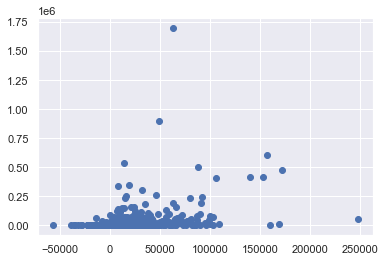

In [65]:
plt.scatter(lr_poly.predict(X_train_poly),y_train)
# plt.yscale('log')
# plt.xscale('log')

In [68]:
pd.DataFrame(X_train_poly)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,14.99,20.0,3.0,2018.0,11.225262,0.0,0.00,0.0,...,400.0,60.0,40360.0,224.505244,9.0,6054.0,33.675787,4072324.0,22652.579115,126.006511
1,1.0,0.0,4.99,5.0,0.0,2018.0,11.225262,0.0,0.00,0.0,...,25.0,0.0,10090.0,56.126311,0.0,0.0,0.000000,4072324.0,22652.579115,126.006511
2,1.0,1.0,4.99,20.0,4.0,2017.0,11.225262,1.0,4.99,20.0,...,400.0,80.0,40340.0,224.505244,16.0,8068.0,44.901049,4068289.0,22641.353853,126.006511
3,1.0,0.0,29.99,20.0,3.0,2020.0,10.000000,0.0,0.00,0.0,...,400.0,60.0,40400.0,200.000000,9.0,6060.0,30.000000,4080400.0,20200.000000,100.000000
4,1.0,0.0,9.99,15.0,2.0,2012.0,11.225262,0.0,0.00,0.0,...,225.0,30.0,30180.0,168.378933,4.0,4024.0,22.450524,4048144.0,22585.227542,126.006511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,1.0,0.0,14.99,20.0,2.0,2016.0,12.000000,0.0,0.00,0.0,...,400.0,40.0,40320.0,240.000000,4.0,4032.0,24.000000,4064256.0,24192.000000,144.000000
3471,1.0,0.0,9.99,13.0,2.0,2015.0,11.225262,0.0,0.00,0.0,...,169.0,26.0,26195.0,145.928409,4.0,4030.0,22.450524,4060225.0,22618.903329,126.006511
3472,1.0,0.0,9.99,4.0,0.0,2017.0,8.000000,0.0,0.00,0.0,...,16.0,0.0,8068.0,32.000000,0.0,0.0,0.000000,4068289.0,16136.000000,64.000000
3473,1.0,0.0,6.99,20.0,1.0,2009.0,11.225262,0.0,0.00,0.0,...,400.0,20.0,40180.0,224.505244,1.0,2009.0,11.225262,4036081.0,22551.551756,126.006511


In [69]:
X_train

,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled
1800,0,14.99,20.0,3.0,2018,11.225262
4052,0,4.99,5.0,0.0,2018,11.225262
3191,1,4.99,20.0,4.0,2017,11.225262
71,0,29.99,20.0,3.0,2020,10.000000
4444,0,9.99,15.0,2.0,2012,11.225262
...,...,...,...,...,...,...
1148,0,14.99,20.0,2.0,2016,12.000000
1886,0,9.99,13.0,2.0,2015,11.225262
3789,0,9.99,4.0,0.0,2017,8.000000
4105,0,6.99,20.0,1.0,2009,11.225262


In [72]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 

    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)

    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

output_df = PolynomialFeatures_labeled(X_train,2)
output_df

,Constant Term,been_sale^1,orig_price^1,num_tags^1,num_genres^1,year_released^1,languages_filled^1,been_sale^2,been_sale^1 x orig_price^1,been_sale^1 x num_tags^1,...,num_tags^2,num_tags^1 x num_genres^1,num_tags^1 x year_released^1,num_tags^1 x languages_filled^1,num_genres^2,num_genres^1 x year_released^1,num_genres^1 x languages_filled^1,year_released^2,year_released^1 x languages_filled^1,languages_filled^2
0,1.0,0.0,14.99,20.0,3.0,2018.0,11.225262,0.0,0.00,0.0,...,400.0,60.0,40360.0,224.505244,9.0,6054.0,33.675787,4072324.0,22652.579115,126.006511
1,1.0,0.0,4.99,5.0,0.0,2018.0,11.225262,0.0,0.00,0.0,...,25.0,0.0,10090.0,56.126311,0.0,0.0,0.000000,4072324.0,22652.579115,126.006511
2,1.0,1.0,4.99,20.0,4.0,2017.0,11.225262,1.0,4.99,20.0,...,400.0,80.0,40340.0,224.505244,16.0,8068.0,44.901049,4068289.0,22641.353853,126.006511
3,1.0,0.0,29.99,20.0,3.0,2020.0,10.000000,0.0,0.00,0.0,...,400.0,60.0,40400.0,200.000000,9.0,6060.0,30.000000,4080400.0,20200.000000,100.000000
4,1.0,0.0,9.99,15.0,2.0,2012.0,11.225262,0.0,0.00,0.0,...,225.0,30.0,30180.0,168.378933,4.0,4024.0,22.450524,4048144.0,22585.227542,126.006511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,1.0,0.0,14.99,20.0,2.0,2016.0,12.000000,0.0,0.00,0.0,...,400.0,40.0,40320.0,240.000000,4.0,4032.0,24.000000,4064256.0,24192.000000,144.000000
3471,1.0,0.0,9.99,13.0,2.0,2015.0,11.225262,0.0,0.00,0.0,...,169.0,26.0,26195.0,145.928409,4.0,4030.0,22.450524,4060225.0,22618.903329,126.006511
3472,1.0,0.0,9.99,4.0,0.0,2017.0,8.000000,0.0,0.00,0.0,...,16.0,0.0,8068.0,32.000000,0.0,0.0,0.000000,4068289.0,16136.000000,64.000000
3473,1.0,0.0,6.99,20.0,1.0,2009.0,11.225262,0.0,0.00,0.0,...,400.0,20.0,40180.0,224.505244,1.0,2009.0,11.225262,4036081.0,22551.551756,126.006511


In [74]:
df.columns

Index(['num_reviews', 'been_sale', 'orig_price', 'num_tags', 'num_genres',
       'year_released', 'languages_filled', 'Activision',
       'BANDAI NAMCO Entertainment', 'Capcom', 'Devolver Digital', 'Disney',
       'Electronic Arts', 'Paradox Interactive', 'SEGA', 'Sokpop Collective',
       'Square Enix', 'THQ Nordic', 'Ubisoft', 'Winged Cloud', 'other',
       'tinyBuild', 'rating_val', 'Singleplayer_tag', 'Indie_tag',
       'Action_tag', 'Adventure_tag', 'Casual_tag', 'Strategy_tag',
       'Multiplayer_tag', 'RPG_tag', 'Simulation_tag', 'Atmospheric_tag',
       'Horror_tag', '2D_tag', 'Soundtrack_tag', 'Great_tag', 'Story_tag',
       'Rich_tag', 'World_tag', 'Shooter_tag', 'Puzzle_tag', 'TurnBased_tag',
       'Open_tag', 'FirstPerson_tag', 'Survival_tag', 'Fantasy_tag',
       'Funny_tag', 'Coop_tag', 'Platformer_tag', 'Early_tag', 'Access_tag',
       'Sim_tag', 'Indie_genre', 'Action_genre', 'Adventure_genre',
       'Casual_genre', 'Simulation_genre', 'Strategy_genre', 'RP

In [75]:
cols = list(df.columns)

In [80]:
cols.insert(6, cols.pop(cols.index('been_sale')))

In [81]:
df = df[cols]

In [83]:
df.head(1)

,num_reviews,orig_price,num_tags,num_genres,year_released,languages_filled,been_sale,Activision,BANDAI NAMCO Entertainment,Capcom,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,36837,59.99,20.0,3.0,2021,13.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X, y = df.iloc[:,1:], df.iloc[:,0]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [106]:
X_train

,orig_price,num_tags,num_genres,year_released,languages_filled,been_sale,Activision,BANDAI NAMCO Entertainment,Capcom,Devolver Digital,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
1800,14.99,20.0,3.0,2018,11.225262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4052,4.99,5.0,0.0,2018,11.225262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3191,4.99,20.0,4.0,2017,11.225262,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,29.99,20.0,3.0,2020,10.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4444,9.99,15.0,2.0,2012,11.225262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,14.99,20.0,2.0,2016,12.000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1886,9.99,13.0,2.0,2015,11.225262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3789,9.99,4.0,0.0,2017,8.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4105,6.99,20.0,1.0,2009,11.225262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X_train_num = X_train.iloc[:,:5]


In [123]:
X_train_cat = X_train.iloc[:,5:].reset_index()
X_train_cat.drop(columns=['index'],inplace=True)
X_train_cat

,been_sale,Activision,BANDAI NAMCO Entertainment,Capcom,Devolver Digital,Disney,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X_train_num

,orig_price,num_tags,num_genres,year_released,languages_filled
1800,14.99,20.0,3.0,2018,11.225262
4052,4.99,5.0,0.0,2018,11.225262
3191,4.99,20.0,4.0,2017,11.225262
71,29.99,20.0,3.0,2020,10.000000
4444,9.99,15.0,2.0,2012,11.225262
...,...,...,...,...,...
1148,14.99,20.0,2.0,2016,12.000000
1886,9.99,13.0,2.0,2015,11.225262
3789,9.99,4.0,0.0,2017,8.000000
4105,6.99,20.0,1.0,2009,11.225262


In [147]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 

    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)

    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

X_train_num_poly = PolynomialFeatures_labeled(X_train_num,3)
X_train_num_poly

,Constant Term,orig_price^1,num_tags^1,num_genres^1,year_released^1,languages_filled^1,orig_price^2,orig_price^1 x num_tags^1,orig_price^1 x num_genres^1,orig_price^1 x year_released^1,...,num_genres^3,num_genres^2 x year_released^1,num_genres^2 x languages_filled^1,num_genres^1 x year_released^2,num_genres^1 x year_released^1 x languages_filled^1,num_genres^1 x languages_filled^2,year_released^3,year_released^2 x languages_filled^1,year_released^1 x languages_filled^2,languages_filled^3
0,1.0,14.99,20.0,3.0,2018.0,11.225262,224.7001,299.80,44.97,30249.82,...,27.0,18162.0,101.027360,12216972.0,67957.737346,378.019534,8.217950e+09,4.571290e+07,254281.140029,1414.456129
1,1.0,4.99,5.0,0.0,2018.0,11.225262,24.9001,24.95,0.00,10069.82,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,8.217950e+09,4.571290e+07,254281.140029,1414.456129
2,1.0,4.99,20.0,4.0,2017.0,11.225262,24.9001,99.80,19.96,10064.83,...,64.0,32272.0,179.604195,16273156.0,90565.415413,504.026046,8.205739e+09,4.566761e+07,254155.133517,1414.456129
3,1.0,29.99,20.0,3.0,2020.0,10.000000,899.4001,599.80,89.97,60579.80,...,27.0,18180.0,90.000000,12241200.0,60600.000000,300.000000,8.242408e+09,4.080400e+07,202000.000000,1000.000000
4,1.0,9.99,15.0,2.0,2012.0,11.225262,99.8001,149.85,19.98,20099.88,...,8.0,8048.0,44.901049,8096288.0,45170.455084,252.013023,8.144866e+09,4.544148e+07,253525.100960,1414.456129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,1.0,14.99,20.0,2.0,2016.0,12.000000,224.7001,299.80,29.98,30219.84,...,8.0,8064.0,48.000000,8128512.0,48384.000000,288.000000,8.193540e+09,4.877107e+07,290304.000000,1728.000000
3471,1.0,9.99,13.0,2.0,2015.0,11.225262,99.8001,129.87,19.98,20129.85,...,8.0,8060.0,44.901049,8120450.0,45237.806658,252.013023,8.181353e+09,4.557709e+07,253903.120494,1414.456129
3472,1.0,9.99,4.0,0.0,2017.0,8.000000,99.8001,39.96,0.00,20149.83,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,8.205739e+09,3.254631e+07,129088.000000,512.000000
3473,1.0,6.99,20.0,1.0,2009.0,11.225262,48.8601,139.80,6.99,14042.91,...,1.0,2009.0,11.225262,4036081.0,22551.551756,126.006511,8.108487e+09,4.530607e+07,253147.081426,1414.456129


In [101]:
X_val_num = X_val.iloc[:,:5]

In [134]:

X_val_cat = X_val.iloc[:,5:].reset_index()
X_val_cat.drop(columns=['index'],inplace=True)

In [148]:
X_val_num_poly = PolynomialFeatures_labeled(X_val_num,3)


In [104]:
X_val_num_poly

,Constant Term,orig_price^1,num_tags^1,num_genres^1,year_released^1,languages_filled^1,orig_price^2,orig_price^1 x num_tags^1,orig_price^1 x num_genres^1,orig_price^1 x year_released^1,...,num_tags^2,num_tags^1 x num_genres^1,num_tags^1 x year_released^1,num_tags^1 x languages_filled^1,num_genres^2,num_genres^1 x year_released^1,num_genres^1 x languages_filled^1,year_released^2,year_released^1 x languages_filled^1,languages_filled^2
0,1.0,14.99,20.0,4.0,2018.0,10.000000,224.7001,299.80,59.96,30249.82,...,400.0,80.0,40360.0,200.000000,16.0,8072.0,40.000000,4072324.0,20180.000000,100.000000
1,1.0,2.99,2.0,2.0,2017.0,11.225262,8.9401,5.98,5.98,6030.83,...,4.0,4.0,4034.0,22.450524,4.0,4034.0,22.450524,4068289.0,22641.353853,126.006511
2,1.0,2.99,6.0,2.0,2016.0,11.225262,8.9401,17.94,5.98,6027.84,...,36.0,12.0,12096.0,67.351573,4.0,4032.0,22.450524,4064256.0,22630.128591,126.006511
3,1.0,1.99,17.0,3.0,2020.0,11.225262,3.9601,33.83,5.97,4019.80,...,289.0,51.0,34340.0,190.829457,9.0,6060.0,33.675787,4080400.0,22675.029640,126.006511
4,1.0,1.99,20.0,4.0,2021.0,11.225262,3.9601,39.80,7.96,4021.79,...,400.0,80.0,40420.0,224.505244,16.0,8084.0,44.901049,4084441.0,22686.254902,126.006511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1.0,4.99,20.0,4.0,2018.0,11.225262,24.9001,99.80,19.96,10069.82,...,400.0,80.0,40360.0,224.505244,16.0,8072.0,44.901049,4072324.0,22652.579115,126.006511
1155,1.0,9.99,20.0,2.0,2008.0,11.000000,99.8001,199.80,19.98,20059.92,...,400.0,40.0,40160.0,220.000000,4.0,4016.0,22.000000,4032064.0,22088.000000,121.000000
1156,1.0,59.99,13.0,3.0,2020.0,8.000000,3598.8001,779.87,179.97,121179.80,...,169.0,39.0,26260.0,104.000000,9.0,6060.0,24.000000,4080400.0,16160.000000,64.000000
1157,1.0,19.99,5.0,3.0,2019.0,11.225262,399.6001,99.95,59.97,40359.81,...,25.0,15.0,10095.0,56.126311,9.0,6057.0,33.675787,4076361.0,22663.804378,126.006511


In [149]:
X_train_merge = pd.merge(X_train_num_poly,X_train_cat, left_index=True, right_index=True)

In [150]:
X_train_merge

,Constant Term,orig_price^1,num_tags^1,num_genres^1,year_released^1,languages_filled^1,orig_price^2,orig_price^1 x num_tags^1,orig_price^1 x num_genres^1,orig_price^1 x year_released^1,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,1.0,14.99,20.0,3.0,2018.0,11.225262,224.7001,299.80,44.97,30249.82,...,0,0,0,0,0,0,0,0,0,0
1,1.0,4.99,5.0,0.0,2018.0,11.225262,24.9001,24.95,0.00,10069.82,...,0,0,0,0,0,0,0,0,0,0
2,1.0,4.99,20.0,4.0,2017.0,11.225262,24.9001,99.80,19.96,10064.83,...,0,0,0,0,0,0,0,0,0,0
3,1.0,29.99,20.0,3.0,2020.0,10.000000,899.4001,599.80,89.97,60579.80,...,0,0,0,0,0,0,0,0,0,0
4,1.0,9.99,15.0,2.0,2012.0,11.225262,99.8001,149.85,19.98,20099.88,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,1.0,14.99,20.0,2.0,2016.0,12.000000,224.7001,299.80,29.98,30219.84,...,1,0,0,0,0,0,0,0,0,0
3471,1.0,9.99,13.0,2.0,2015.0,11.225262,99.8001,129.87,19.98,20129.85,...,0,0,0,0,0,0,0,0,0,0
3472,1.0,9.99,4.0,0.0,2017.0,8.000000,99.8001,39.96,0.00,20149.83,...,0,0,0,0,0,0,0,0,0,0
3473,1.0,6.99,20.0,1.0,2009.0,11.225262,48.8601,139.80,6.99,14042.91,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X_val_num_poly.shape

(1159, 21)

In [138]:
X_val_cat.shape

(1159, 77)

In [152]:
X_val_merge = pd.merge(X_val_num_poly, X_val_cat, left_index=True, right_index=True)
X_val_merge

,Constant Term,orig_price^1,num_tags^1,num_genres^1,year_released^1,languages_filled^1,orig_price^2,orig_price^1 x num_tags^1,orig_price^1 x num_genres^1,orig_price^1 x year_released^1,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,1.0,14.99,20.0,4.0,2018.0,10.000000,224.7001,299.80,59.96,30249.82,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.99,2.0,2.0,2017.0,11.225262,8.9401,5.98,5.98,6030.83,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2.99,6.0,2.0,2016.0,11.225262,8.9401,17.94,5.98,6027.84,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.99,17.0,3.0,2020.0,11.225262,3.9601,33.83,5.97,4019.80,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.99,20.0,4.0,2021.0,11.225262,3.9601,39.80,7.96,4021.79,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1.0,4.99,20.0,4.0,2018.0,11.225262,24.9001,99.80,19.96,10069.82,...,0,1,0,0,0,0,0,0,0,0
1155,1.0,9.99,20.0,2.0,2008.0,11.000000,99.8001,199.80,19.98,20059.92,...,0,0,0,0,0,0,0,0,0,0
1156,1.0,59.99,13.0,3.0,2020.0,8.000000,3598.8001,779.87,179.97,121179.80,...,0,1,0,0,0,0,0,0,0,0
1157,1.0,19.99,5.0,3.0,2019.0,11.225262,399.6001,99.95,59.97,40359.81,...,0,0,0,0,0,0,0,0,0,0


In [173]:
lr.fit(X_train_merge, y_train)

LinearRegression()

In [174]:
lr.score(X_train_merge, y_train)

0.2042130299446272

In [169]:
lr.score(X_val_merge, y_val)

0.18604249779420445

In [156]:
X_test_num = X_test.iloc[:,:5]
X_test_cat = X_test.iloc[:,5:].reset_index()
X_test_cat.drop(columns=['index'],inplace=True)

In [157]:
X_test_num_poly = PolynomialFeatures_labeled(X_test_num,3)

In [161]:
X_test_merged = pd.merge(X_test_num_poly, X_test_cat,left_index=True, right_index=True)

In [177]:
lr.score(X_test_merged,y_test)

-0.06824671078778777

In [165]:
X_train_merge['year_log'] = np.log(X_train_merge['year_released^1'])

In [166]:
X_val_merge['year_log'] = np.log(X_val_merge['year_released^1'])

In [176]:
X_test_merged['year_log'] = np.log(X_test_merged['year_released^1'])

In [178]:
X

,orig_price,num_tags,num_genres,year_released,languages_filled,been_sale,Activision,BANDAI NAMCO Entertainment,Capcom,Devolver Digital,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,59.99,20.0,3.0,2021,13.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.99,20.0,3.0,2021,12.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19.99,20.0,6.0,2021,12.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24.99,20.0,7.0,2013,14.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29.99,20.0,2.0,2020,10.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,0.99,19.0,5.0,2015,11.225262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5789,4.99,3.0,3.0,2016,7.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5790,4.99,2.0,2.0,2016,7.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5791,0.99,11.0,4.0,2015,11.225262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
train_preds = lr.predict(X_train_merge)

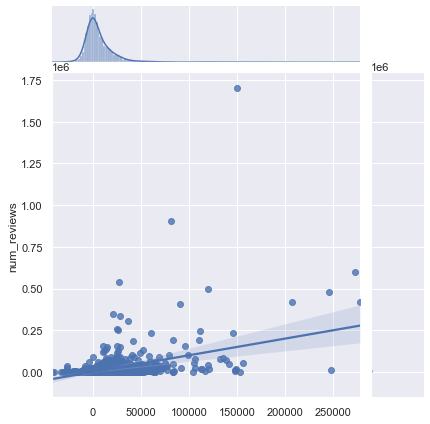

In [184]:
sns.jointplot(x=train_preds,y=y_train, kind='reg')

In [187]:
rmse = mean_squared_error(y_train, train_preds, squared=False)
mae = mean_absolute_error(y_train, train_preds)

In [188]:
print(rmse)
print(mae)

38931.64872343298
11259.628665336773
